Jason Nero                                                                               
- DSCI 235: Bring Your Own Data Project
- 4/25/2021
- GitHub Repository: https://github.com/jason-nero/DSCI_235_Final_Project
- Dataset: https://www.kaggle.com/jealousleopard/goodreadsbooks

Variables
- bookID: A unique Identification number for each book.
- title: The name under which the book was published. 
- authors: Names of the authors of the book. Multiple authors are delimited with -.
- average_rating: The average rating of the book received in total.
- isbn: Unique number to identify the book, the International Standard Book Number.
- isbn13: A 13-digit ISBN to identify the book, instead of the standard 11-digit ISBN.
- language_code: Primary language of the book.
- num_pages: Number of pages the book contains.
- rating_count: Total number of ratings the book received.
- text_reviews_count: Total number of written text reviews the book received.
- publication_date: Date when the book was published 
- publisher: Name of the company that published the book.

<div class="alert alert-block alert-warning">
Question: From the dataset derived from Goodreads, a website for readers and book recommendations, data about book and user information, are there any consumer trends to be found amongst each book's average rating, ratings count, primary print language, and the number of pages?

***

In [1]:
# loading python packages and the dataset from github repository. 
import pandas as pd 
import numpy as np 
import matplotlib.pylab as plt
url = 'https://raw.githubusercontent.com/jason-nero/DSCI_235_Final_Project/main/books.csv'
data = pd.read_csv(url, error_bad_lines = False)

# confirm successful loading of dataset 
print(data.shape)
data.head()

# removing columns not be needed for the analysis (bookID, isbn, isbn13, publication_data, publisher, text_reviews_count)
data = data[['title', 'authors', 'language_code', 'average_rating', 'num_pages', 'ratings_count']]

(11123, 12)


<div class="alert alert-block alert-warning">
With the dataset that we want to explore successful loaded and the question we are looking to potentially answer estblished, the first step is to remove variables and associated columns of these variables that will not be looked at during this exploratory anaylsis for consumer trends.

***

### Exploring average ratings and ratings count

In [2]:
# books with the highest average score(5.0) and maximum rating count
sort_max = data.sort_values(by=['average_rating', 'ratings_count'], ascending = False)
sort_five = sort_max[sort_max['average_rating'] == 5.0]
print("Number of books within the dataset that have the higheset (5.0) average rating: " + 
      str(sort_max[sort_max['average_rating'] == 5.0].shape[0]))

Number of books within the dataset that have the higheset (5.0) average rating: 22


In [3]:
# books with the lowest average score(0) and minimum rating count
sort_min = data.sort_values(by=['average_rating', 'ratings_count'])
sort_zero = sort_min[sort_min['average_rating'] == 0.0]
print("Number of books within the dataset that have the lowest (0.0) average rating: " + 
      str(sort_min[sort_min['average_rating'] == 0.0].shape[0]))

Number of books within the dataset that have the lowest (0.0) average rating: 25


In [4]:
# pull entry with an odd average rating and ratings count previously identified. 
data.iloc[624]

title             Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...
authors                         Aristophanes/F.W. Hall/W.M. Geldart
language_code                                                   grc
average_rating                                                    5
num_pages                                                       364
ratings_count                                                     0
Name: 624, dtype: object

In [5]:
# pull entry to verify bottom line.
data.iloc[265]

title             Out to Eat London 2002 (Lonely Planet Out to Eat)
authors                                    Lonely Planet/Mark Honan
language_code                                                   eng
average_rating                                                    0
num_pages                                                       295
ratings_count                                                     0
Name: 265, dtype: object

<div class="alert alert-block alert-warning">
    
The look into the average ratings and ratings count is to lay the foundation for further exploration, acting as a catylist of sorts for exploring how the primary language the book is printed in and the number of pages found in the book may reveal a consumer trend. The exploration did reveal some quirks about the dataset such as book "Comoediae 1: Acharenses/Equites/Nubes/Vespae/P..." by Aristophanes/F.W. Hall/W.M. Geldart which have an average rating of 5.0 but it has no ratings count. The quirk is likely a data entry error, seen further when looking at books with an average rating of zero and a rating count of zero so it is still worth noting and warranted another scan through the dataset which did reveal some additional entry errors that required cleaning, such as author in ratings count, to make further exploration of the dataset possible.

***

<div class="alert alert-block alert-warning">
The next step is to explore what languages each book is printed in, then the number of pages in each book, looking for any initial consumer trends when looking at just the single variable. For both cases, average ratings and ratings count will then be reintroduced to see if additional variables cause any trends to arise. Providing analysis and observations as each section is explored. 

### Exploring language

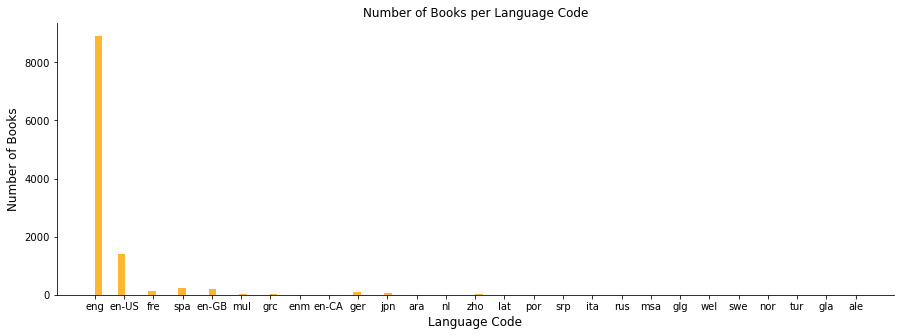

In [6]:
# plot of the number of books in each language code catagory.
fig, ax = plt.subplots()
languages = data['language_code']
languages.hist(bins=100, alpha=0.8, figsize=(15,5), color = 'orange')
plt.title('Number of Books per Language Code',fontsize=12)
plt.xlabel('Language Code',fontsize=12);
plt.ylabel('Number of Books', fontsize=12);
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.grid(False)

In [7]:
# number of books in each language code
data['language_code'].value_counts()

eng      8908
en-US    1408
spa       218
en-GB     214
fre       144
ger        99
jpn        46
mul        19
zho        14
grc        11
por        10
en-CA       7
ita         5
lat         3
enm         3
rus         2
swe         2
tur         1
ale         1
srp         1
wel         1
glg         1
gla         1
nl          1
ara         1
msa         1
nor         1
Name: language_code, dtype: int64

In [8]:
# count of books that have the primary language code eng.(english).
eng = data['language_code'].value_counts()[:1]
print(eng)

# percentage of books in the dataset that are primary language code eng.
print(eng/data['language_code'].shape[0])

eng    8908
Name: language_code, dtype: int64
eng    0.800863
Name: language_code, dtype: float64


<div class="alert alert-block alert-warning">
Analyzing the number of books in each language code category, whether it be graphically or numerically, shows a clear majority, about 80 percent, of the books reside in the English language category. Before assuming that there may be a trend amongst Goodreads consumers that they prefer books printed in English, the company, Goodreads, is based in the U.S., where English is the most common language spoken and written. However, consumers can manually add books to the database that this dataset is drawn from, so there is a possibility that the trend that Goodreads consumers prefer books printed in English is accurate, especially when about 80 percent of the books are in English but due to a lack of information in the dataset indicating which books were part of the initial database provided by Goodreads and what books are submitted by users would require more research before making a definitive decision. 

***

### Exploring language, average rating, and ratings count

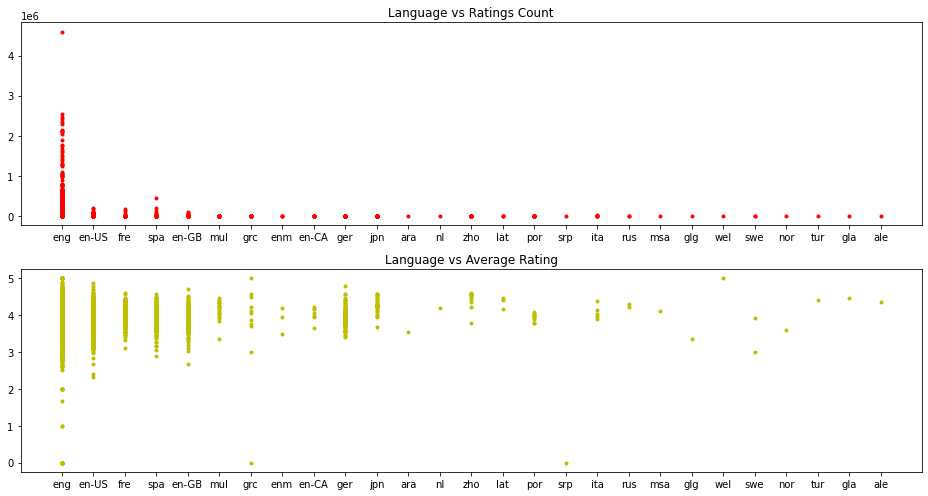

In [9]:
# plots of number of pages against ratings count then against average ratings
languages = data['language_code']
x1 = data.language_code
y1 = data.ratings_count
x2 = data.language_code
y2 = data.average_rating
fig, axs = plt.subplots(2, figsize=(13,7))
axs[0].plot(x1, y1, 'r.')
axs[0].set_title('Language vs Ratings Count')
axs[1].plot(x2, y2, 'y.')
axs[1].set_title('Language vs Average Rating')
fig.tight_layout()

In [10]:
# group dataset by language code and title then determine max average rating. 
data.groupby(['language_code', 'title'])['average_rating'].max()

language_code  title                                     
ale            Shield of Thunder (Troy  #2)                  4.36
ara            Zaat                                          3.55
en-CA          A Christmas Carol                             4.05
               A Circle of Quiet (Crosswicks Journals #1)    4.21
               A Theory of Fun for Game Design               3.94
                                                             ... 
zho            鋼之鍊金術師 6                                      4.58
               鋼之鍊金術師 7                                      4.57
               鋼之鍊金術師 9                                      4.57
               魔戒二部曲：雙城奇謀                                    4.44
               魔戒首部曲：魔戒現身                                    4.36
Name: average_rating, Length: 10512, dtype: float64

In [11]:
# group dataset by language code and title then determine max ratings count. 
data.groupby(['language_code', 'title'])['ratings_count'].max()

language_code  title                                     
ale            Shield of Thunder (Troy  #2)                   102
ara            Zaat                                           122
en-CA          A Christmas Carol                             4359
               A Circle of Quiet (Crosswicks Journals #1)    5236
               A Theory of Fun for Game Design               2113
                                                             ... 
zho            鋼之鍊金術師 6                                         5
               鋼之鍊金術師 7                                         5
               鋼之鍊金術師 9                                         4
               魔戒二部曲：雙城奇謀                                      24
               魔戒首部曲：魔戒現身                                      26
Name: ratings_count, Length: 10512, dtype: int64

<div class="alert alert-block alert-warning">
Whether it is the graphical or numerical analysis, there is no noticeable consumer trend when looking at the max ratings count and average count across language doesn't reveal a trend amongst consumers. As previously mentioned, when just looking at the languages in which the books are printed, there is a lack of books available in languages that are not English which hinders the analysis performed in this section.  

***

### Exploring number of pages


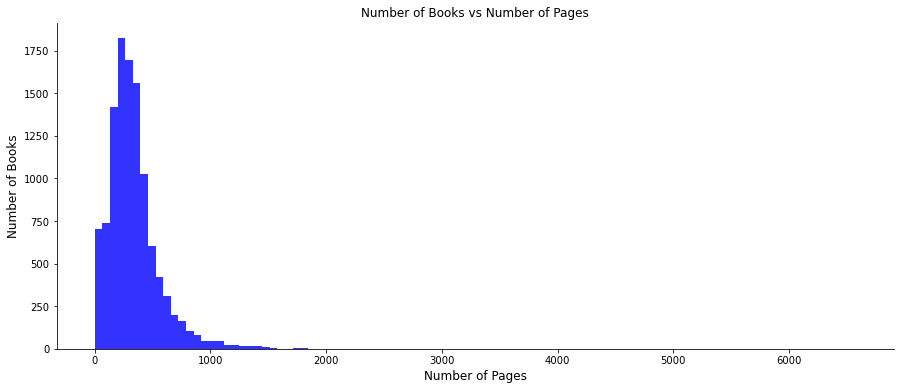

In [12]:
# hist of the number of pages found in each book
fig, ax = plt.subplots()
pages = data['num_pages']
pages.hist(bins=100, alpha=0.8, figsize=(15,6), color = 'blue')
plt.title('Number of Books vs Number of Pages',fontsize=12)
plt.xlabel('Number of Pages',fontsize=12);
plt.ylabel('Number of Books', fontsize=12);
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.grid(False)

### Exploring number of pages, average rate, ratings count

In [13]:
#isolating relevant columns of the dataset to address the question within books only printed in English. 
impact_numpages = data[['title', 'language_code', 'average_rating', 'num_pages', 'ratings_count']]
impact_numpages = impact_numpages[impact_numpages['language_code'] == 'eng']

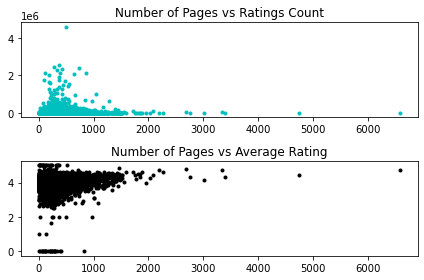

In [14]:
#plots of number of pages against ratings count then average ratings to look for potential 
x1 = impact_numpages.num_pages
y1 = impact_numpages.ratings_count
x2 = impact_numpages.num_pages
y2 = impact_numpages.average_rating
fig, axs = plt.subplots(2)
axs[0].plot(x1, y1, 'c.')
axs[0].set_title('Number of Pages vs Ratings Count')
axs[1].plot(x2, y2, 'k.')
axs[1].set_title('Number of Pages vs Average Rating')
fig.tight_layout()

<div class="alert alert-block alert-warning">
With the first graph, the ratings count decreases as the number of pages increases, and there might be a rise in the average rating of books as the number of pages increases. However, looking at the histogram of the number of pages, it is clear that there is also a decline in the number of books as the number of pages increases, especially once the number of pages is greater than five hundred. As a result, a more granular approach, looking at ratios of average ratings to the number of pages and ratings count to the number of pages, might reveal more information to determine if a trend is present. 

In [15]:
#Calculate the percentage of number of reads to the number of pages. Add results as a column to table.
ratingc = impact_numpages['ratings_count'].astype(int)
nump = impact_numpages['num_pages'].astype(int)
ratnum_ratio = ratingc.div(nump, fill_value = 0)
impact_numpages = pd.DataFrame(data=impact_numpages)
impact_numpages['rating_page_ratio'] = ratnum_ratio

#Calculate the average ratings to the number of pages. Add results as a column to table.
av_rating = impact_numpages['average_rating'].astype(int)
nump = impact_numpages['num_pages'].astype(int)
av_ratio = av_rating.div(nump, fill_value = 0)
impact_numpages = pd.DataFrame(data=impact_numpages)
impact_numpages['average_page_ratio'] = av_ratio

In [16]:
# remove any NA or infinity values, reorganize index, then output first 10 entries in descending order
# for number of pages and rating to page number ratio. 
pd.set_option('mode.use_inf_as_na', True)
impact_numpages.dropna(inplace=True)
impact_numpages = impact_numpages.set_index(['title', 'language_code', 'num_pages', 'ratings_count', 'rating_page_ratio', 'average_rating', 'average_page_ratio'])
impact_numpages.sort_values(by=['num_pages','rating_page_ratio']).head(n=10)

,,,,,,
title,language_code,num_pages,ratings_count,rating_page_ratio,average_rating,average_page_ratio
The Best American Mystery Stories 2002,eng,1,0,0.0,3.58,3.0
The Best American Mystery Stories 2003,eng,1,5,5.0,3.60,3.0
Matilda,eng,1,6,6.0,4.31,4.0
There Was a Cold Lady Who Swallowed Some Snow!,eng,1,14,14.0,3.85,3.0
The Return of the King (The Lord of the Rings #3),eng,1,17,17.0,4.35,4.0
Antibodies,eng,1,67,67.0,3.46,3.0
Essential Welty: Why I Live at the P.O. A Memory Powerhouse and Petrified Man,eng,1,92,92.0,3.94,3.0
Lobsters,eng,1,158,158.0,3.83,3.0
Meditations for Manifesting: Morning and Evening Meditations to Literally Create Your Heart's Desire,eng,1,338,338.0,4.02,4.0


In [17]:
# output first 10 entries in ascending order for number of pages and rating to page number ratio.  
impact_numpages.sort_values(by=['num_pages','rating_page_ratio'], ascending = False).head(n=10)

,,,,,,
title,language_code,num_pages,ratings_count,rating_page_ratio,average_rating,average_page_ratio
The Complete Aubrey/Maturin Novels (5 Volumes),eng,6576,1338,0.203467,4.70,0.000608
The Second World War,eng,4736,1493,0.315245,4.45,0.000845
Remembrance of Things Past (Boxed Set),eng,3400,6,0.001765,4.34,0.001176
Harry Potter Collection (Harry Potter #1-6),eng,3342,28242,8.450628,4.73,0.001197
Summa Theologica 5 Vols,eng,3020,2734,0.905298,4.12,0.001325
Harrison's Principles of Internal Medicine,eng,2751,23,0.008361,4.35,0.001454
Harry Potter Boxed Set Books 1-5 (Harry Potter #1-5),eng,2690,41428,15.400743,4.78,0.001487
The J.R.R. Tolkien Companion and Guide,eng,2264,45,0.019876,4.64,0.001767
Study Bible: NIV,eng,2198,4166,1.895359,4.70,0.001820


In [18]:
# output first 10 entries in descending order for number of pages and average rating to page number ratio.  
impact_numpages.sort_values(by=['num_pages','average_rating']).head(n=10)

,,,,,,
title,language_code,num_pages,ratings_count,rating_page_ratio,average_rating,average_page_ratio
Antibodies,eng,1,67,67.0,3.46,3.0
The Best American Mystery Stories 2002,eng,1,0,0.0,3.58,3.0
The Best American Mystery Stories 2003,eng,1,5,5.0,3.60,3.0
LT's Theory of Pets,eng,1,2824,2824.0,3.69,3.0
Lobsters,eng,1,158,158.0,3.83,3.0
There Was a Cold Lady Who Swallowed Some Snow!,eng,1,14,14.0,3.85,3.0
Essential Welty: Why I Live at the P.O. A Memory Powerhouse and Petrified Man,eng,1,92,92.0,3.94,3.0
Meditations for Manifesting: Morning and Evening Meditations to Literally Create Your Heart's Desire,eng,1,338,338.0,4.02,4.0
The Neil Gaiman Audio Collection,eng,1,1666,1666.0,4.24,4.0


In [19]:
# output first 10 entries in ascending order for number of pages and average rating to page number ratio.  
impact_numpages.sort_values(by=['num_pages','average_rating'], ascending = False).head(n=10)

,,,,,,
title,language_code,num_pages,ratings_count,rating_page_ratio,average_rating,average_page_ratio
The Complete Aubrey/Maturin Novels (5 Volumes),eng,6576,1338,0.203467,4.70,0.000608
The Second World War,eng,4736,1493,0.315245,4.45,0.000845
Remembrance of Things Past (Boxed Set),eng,3400,6,0.001765,4.34,0.001176
Harry Potter Collection (Harry Potter #1-6),eng,3342,28242,8.450628,4.73,0.001197
Summa Theologica 5 Vols,eng,3020,2734,0.905298,4.12,0.001325
Harrison's Principles of Internal Medicine,eng,2751,23,0.008361,4.35,0.001454
Harry Potter Boxed Set Books 1-5 (Harry Potter #1-5),eng,2690,41428,15.400743,4.78,0.001487
The J.R.R. Tolkien Companion and Guide,eng,2264,45,0.019876,4.64,0.001767
Study Bible: NIV,eng,2198,4166,1.895359,4.70,0.001820


<div class="alert alert-block alert-warning">
The more granular look at the potential relationship between the number of pages and average ratings and the number of pages and ratings count the analysis is inconclusive, requires additional exploration to make a definitive decision if a consumer trend is present. 

***

<div class="alert alert-block alert-warning">
When it comes to consumer trends performing exploratory analysis is a valuable tool to help determine if a new or existing consumer trend is present. The exploration analysis in this journal aimed to answer whether there are any consumer trends to be found amongst each book's average rating, ratings count, primary print language, and the number of pages in a dataset taken from the website Goodreads. The analysis results did not definitively answer the proposed question, warranting additional data collection and a more organized dataset, such as whether or not the book data is coming from Goodreads or users, to answer the question properly.